# Off Grid PV: Simple Battery  Performance Evaluation

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime

In [17]:
file = 'data/OFF_Grid.csv'
df = pd.read_csv(file, index_col='date', parse_dates=True)
df.index = df.index + pd.DateOffset(year=2013)
#df.head()
#df.columns

/home/jab/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:692: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex



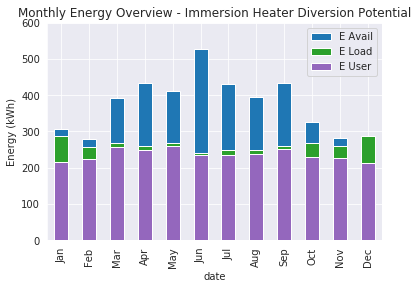

In [18]:
# Yearly Energy Overview
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax = df['E Avail'].resample('M').sum().plot.bar(color='C0')
ax = df['E Load'].resample('M').sum().plot.bar(color='C2')
ax = df['E User'].resample('M').sum().plot.bar(color='C4')
ax.legend()
ax.set_ylabel('Energy (kWh)')
ax.set_ylim(0, 600)
ax.set_title('Monthly Energy Overview - Immersion Heater Diversion Potential')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=90)
plt.savefig('Off Grid Monthly Energy Overview.svg')
plt.show()

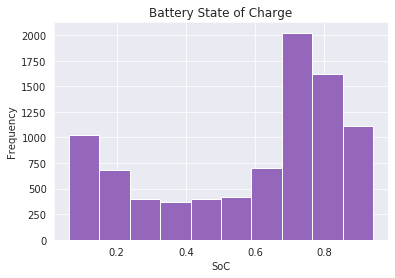

In [19]:
#Battery state of charge
ax = df['SOCmean'].plot.hist(color='C4')
ax.set_ylabel('Frequency')
ax.set_xlabel('SoC')
ax.set_title('Battery State of Charge')
plt.show()

In [20]:
fig = go.Figure(data=go.Heatmap(
        z=df['SOCmean'],
        x=df.index.date,
        y=df.index.hour,
        colorscale='Viridis'))

fig.update_layout(
    title='Hourly Battery State of Charge',
    xaxis_nticks=12,
    yaxis_title="Hour of the Day",
    
)
#fig.write_image("Battery SoC Heatmap.svg")
fig.show()


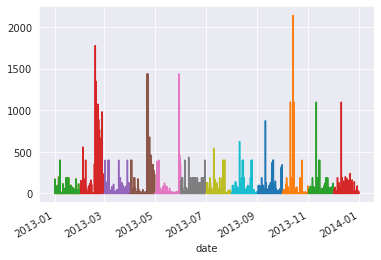

In [21]:
df['PR'].resample('M').plot()
plt.show()


In [22]:
df = df[df.EffArrR != 0]

In [23]:
# https://pvpmc.sandia.gov/modeling-steps/2-dc-module-iv/cell-temperature/pvsyst-cell-temperature-model/
alpha = 0.9
eta_m = 0.1
U0 = 15
U1 = 6.28

df['Tc'] = df['T Amb'] + df['GlobInc'] * (alpha*(1-eta_m)/(U0+U1*df['WindVel']))

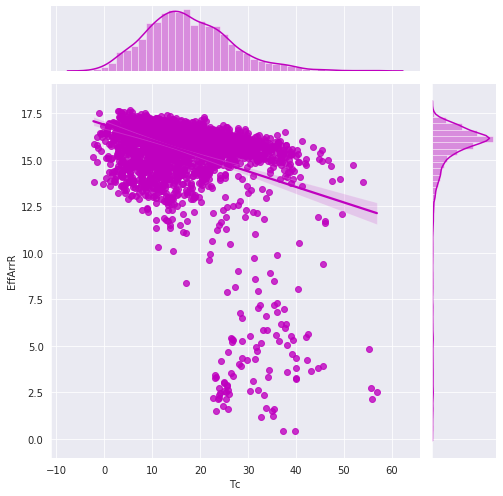

In [24]:
sns.jointplot(x= df['Tc'],y = df['EffArrR'],kind = "reg", color="m", height=7)
plt.show()

In [25]:
(df['Tc']-df['TArray']).describe()


count    3183.000000
mean       -3.080625
std         4.140172
min       -24.990612
25%        -4.514578
50%        -1.553515
75%        -0.429257
max        11.460373
dtype: float64

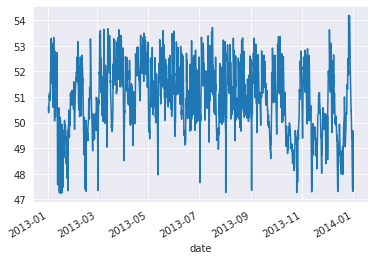

In [26]:
df['U Batt'].plot()
plt.show()

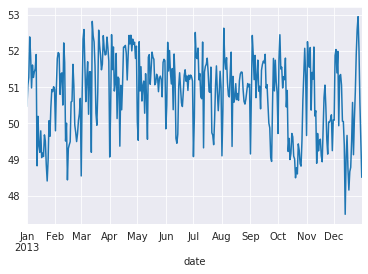

In [27]:
df['U Batt'].resample('D').mean().plot()
plt.show()